In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin

In [3]:
# import dataset
data = pd.read_csv('PEP1.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1. Understand the dataset:
a. Identify the shape of the dataset

b. Identify variables with null values

c. Identify variables with unique values

In [4]:
# a. Identify the shape of the dataset
print('Shape of the dataset :',data.shape)

Shape of the dataset : (1460, 81)


In [5]:
# b. Identify variables with null values

data_null = pd.DataFrame(data[data.columns[data.isna().any()]].isna().sum())
data_null['percentage'] = data.isna().sum() / data.shape[0]*100
data_null = data_null.reset_index()
data_null = data_null.rename(columns={'index':'Variables',0:'Count'})
data_null = data_null.sort_values(by='Count',ascending=False)
data_null

,Variables,Count,percentage
16,PoolQC,1453,99.520548
18,MiscFeature,1406,96.301370
1,Alley,1369,93.767123
17,Fence,1179,80.753425
10,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
11,GarageType,81,5.547945
12,GarageYrBlt,81,5.547945
13,GarageFinish,81,5.547945
14,GarageQual,81,5.547945


In [6]:
# c. Identify variables with unique values

for i in data.columns:
    print({i : data[i].unique()})

{'Id': array([   1,    2,    3, ..., 1458, 1459, 1460], dtype=int64)}
{'MSSubClass': array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)}
{'MSZoning': array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)}
{'LotFrontage': array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 

# 2. 2.	Generate a separate dataset for numerical and categorical variables

In [7]:
data_categorical = data.select_dtypes(exclude=np.number)
data_numerical = data.select_dtypes(include=np.number)

In [8]:
data_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [9]:
data_numerical.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


# 3.	EDA of numerical variables:
a.	Missing value treatment

b.	Identify the skewness and distribution

c.	Identify significant variables using a correlation matrix 

d.	Pair plot for distribution and density

In [10]:
# a. Missing value treatment

class SimpleImputerLookup(SimpleImputer):
    def __init__(self, fill_values=None, **kwargs): 
        kwargs["strategy"] = "constant" 
        super().__init__(**kwargs) 
        self.fill_values = fill_values 
    def fit(self, X):
        super().fit(X) 
        if isinstance(self.fill_values, dict) and hasattr(X, "columns"): 
            self.statistics_ = np.array([self.fill_values[c] for c in X.columns])
        else: 
            self.statistics_ = np.array(self.fill_values)
        return self 
    
numeric_cols = [data.select_dtypes(exclude=['object']).columns]
impute_numeric_data = []
for col in numeric_cols:
    imp = SimpleImputerLookup(fill_values=data_numerical[col].mean())
    impute_numeric_data = pd.DataFrame(imp.fit_transform(data_numerical))
    impute_numeric_data.columns = data_numerical.columns
    impute_numeric_data.append(impute_numeric_data)

In [11]:
print('Before implementation of Simple Imputer on numeric data :',data.isna().sum().any())
print('After implementation of Simple Imputer on numeric data :',impute_numeric_data.isna().sum().any())

Before implementation of Simple Imputer on numeric data : True
After implementation of Simple Imputer on numeric data : False


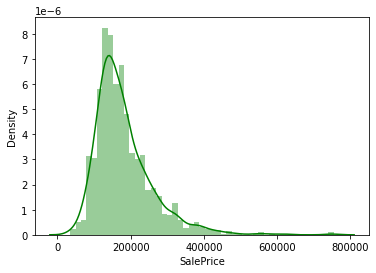

In [12]:
# b. Identify the skewness and distribution
sns.distplot(impute_numeric_data['SalePrice'],color='g')
plt.show()

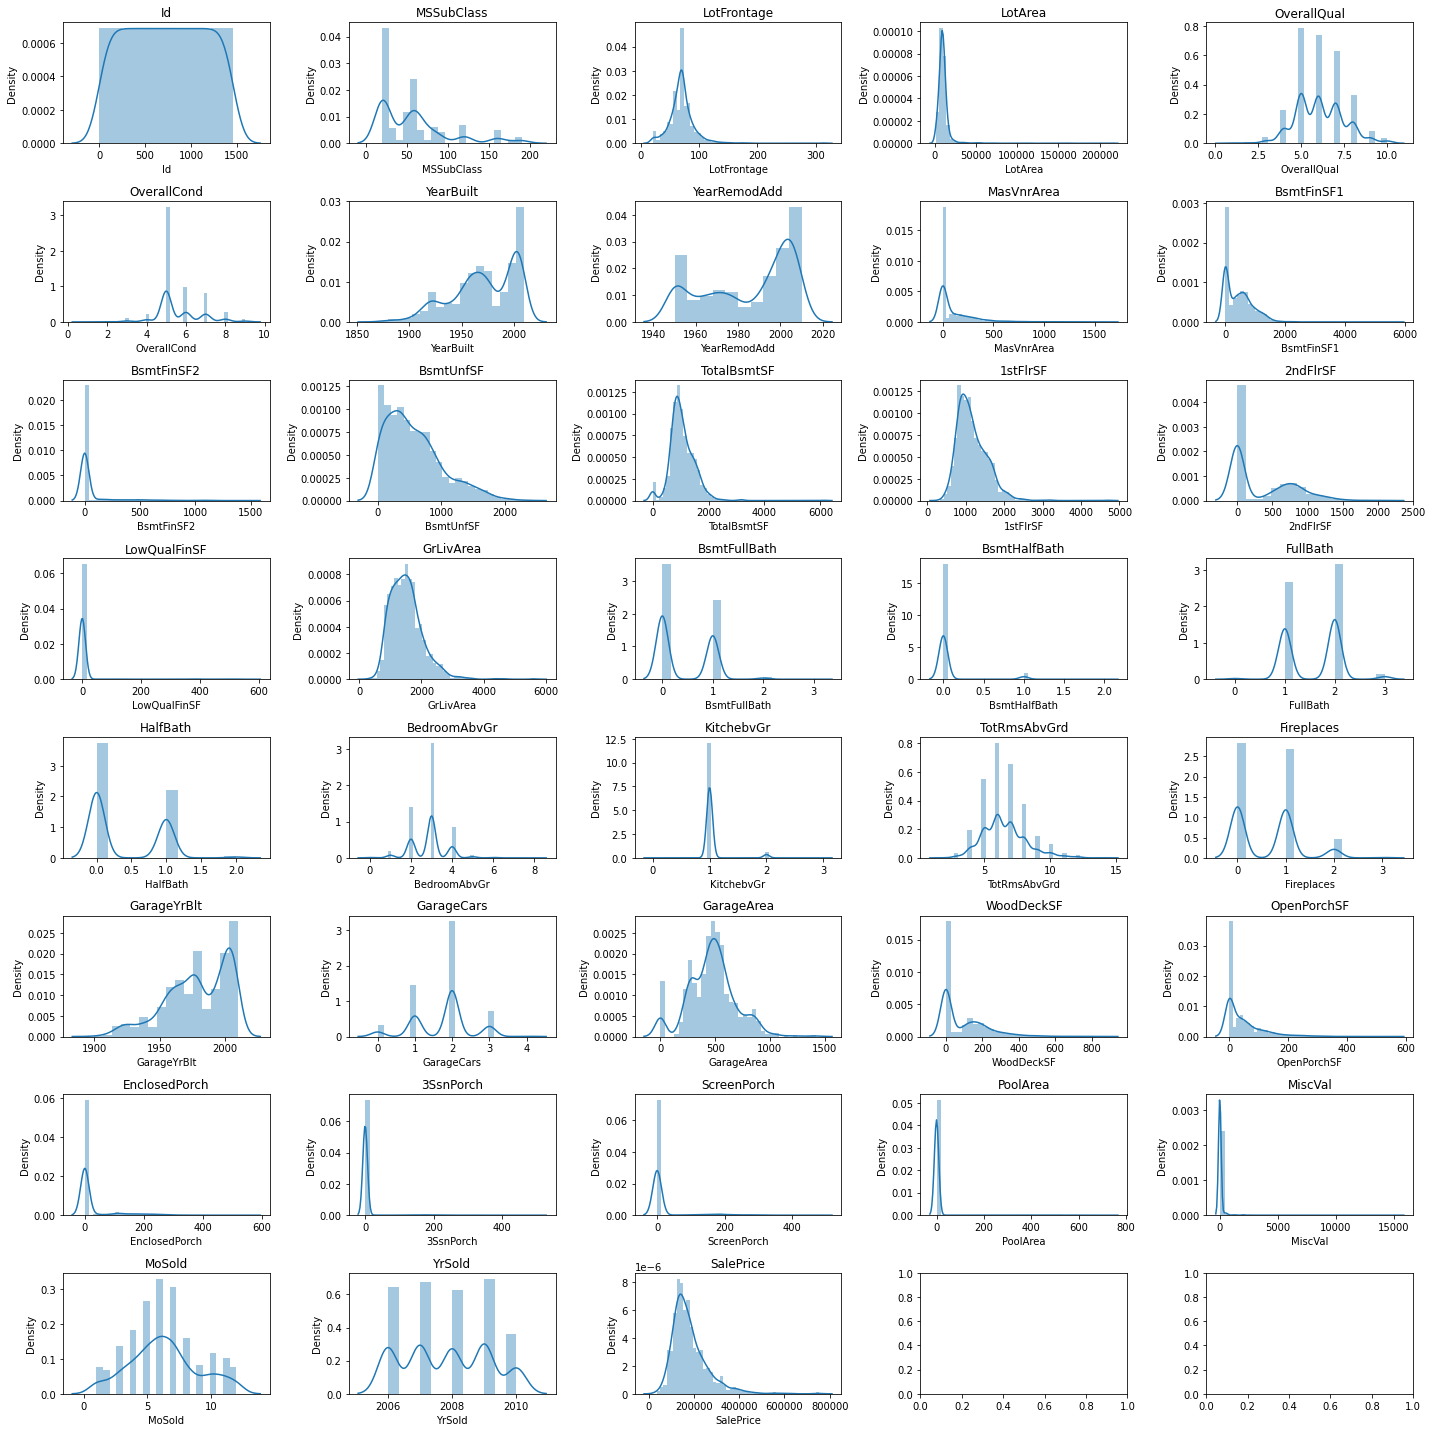

In [13]:
fig,axes = plt.subplots(nrows=8,ncols=5)
axes = axes.flatten()
fig.set_size_inches(20,20)

for ax, col in zip(axes,impute_numeric_data.columns):
    sns.distplot(impute_numeric_data[col],ax=ax)
    ax.set_title(col)
plt.tight_layout()

In [14]:
# c. Identify significant variables using a correlation matrix
data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


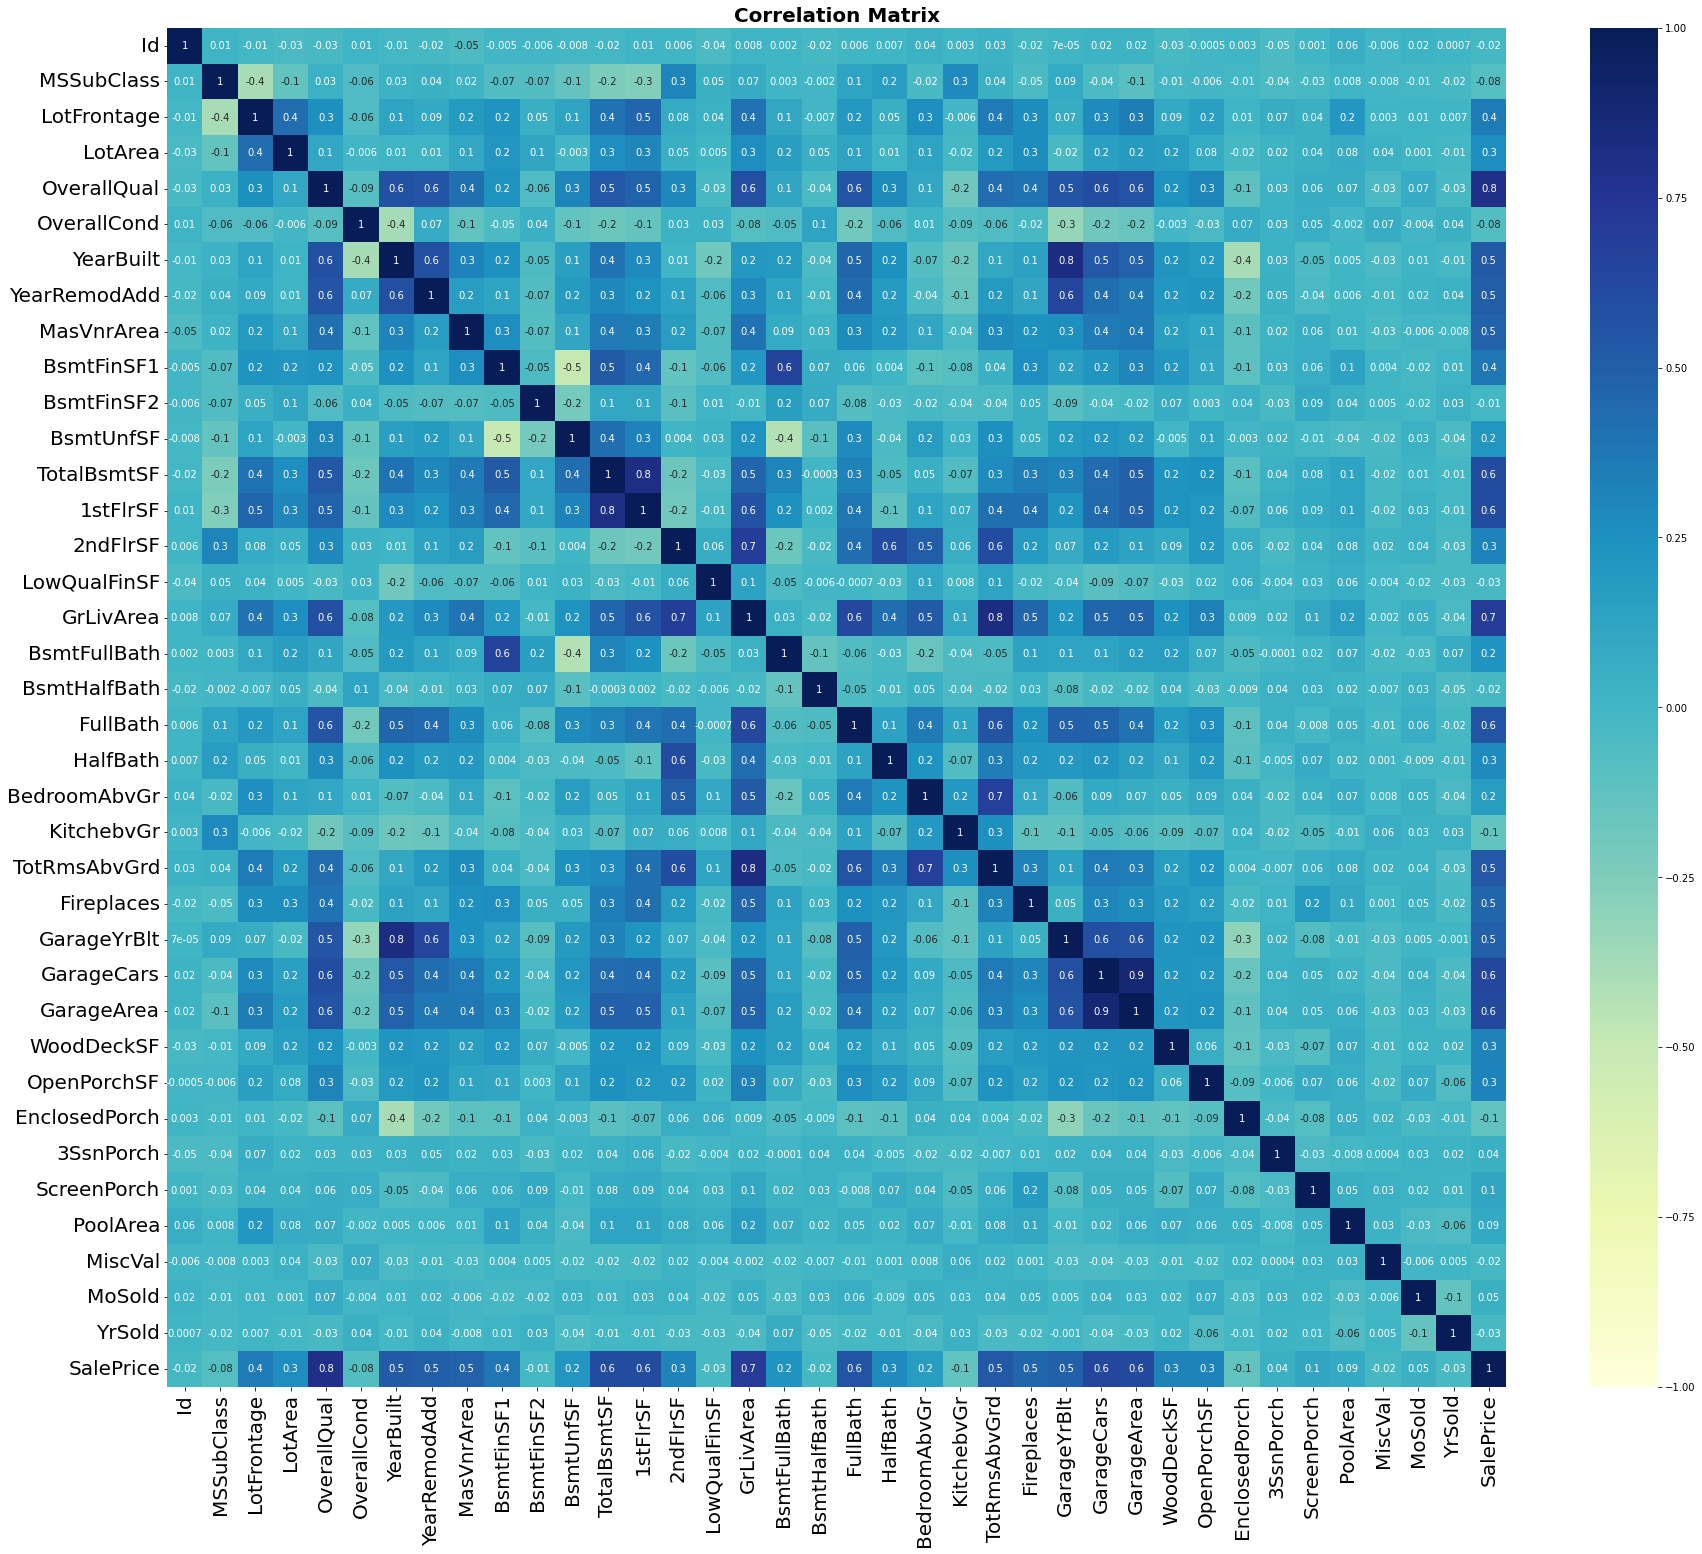

In [15]:
plt.figure(figsize=(30,25))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True,fmt='.1g',vmax=1,vmin=-1)
plt.tick_params(labelsize=20)
plt.title('Correlation Matrix', fontsize=20,weight='bold')
plt.show()

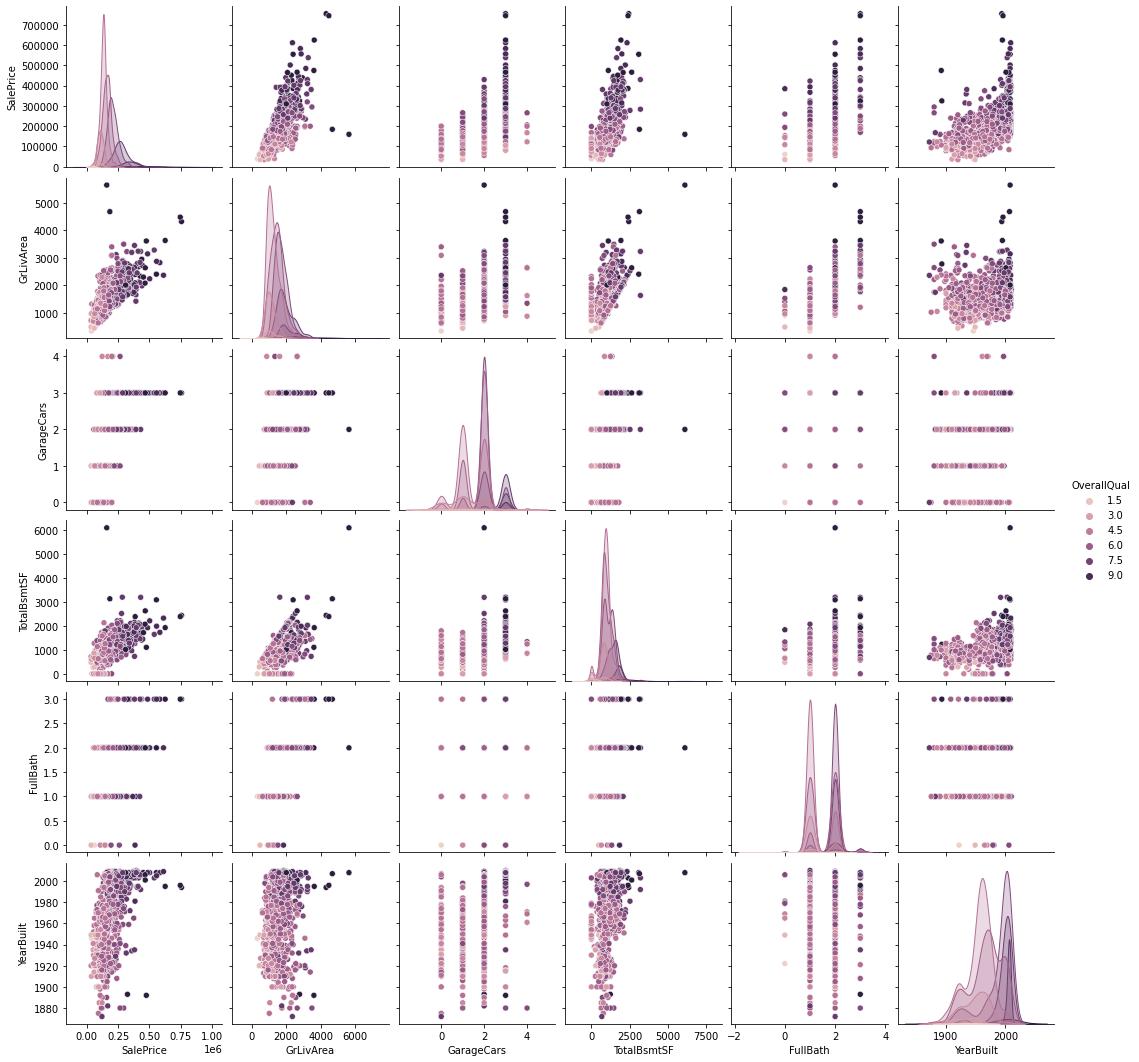

In [16]:
# d. Pair plot for distribution and density

cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(impute_numeric_data[cols],hue='OverallQual')

# 4.	EDA of categorical variables

a.	Missing value treatment

b.	Count plot and box plot for bivariate analysis

c.	Identify significant variables using p-values and Chi-Square values

In [17]:
# a. Missing value treatment.

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mode() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

impute_categoric_data = pd.DataFrame(data_categorical)
impute_categoric_data = DataFrameImputer().fit_transform(impute_categoric_data)

In [18]:
print('Before implementation of Simple Imputer on categorical data :',data_categorical.isna().sum().any())
print('After implementation of Simple Imputer on categorical data :',impute_categoric_data.isna().sum().any())

Before implementation of Simple Imputer on categorical data : True
After implementation of Simple Imputer on categorical data : False


<Figure size 720x360 with 0 Axes>

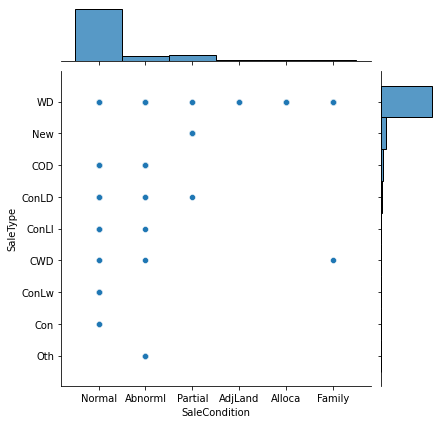

In [19]:
# b. Count plot and box plot for bivariate analysis

plt.figure(figsize=(10,5))
sns.jointplot('SaleCondition','SaleType',data=impute_categoric_data,kind='scatter')

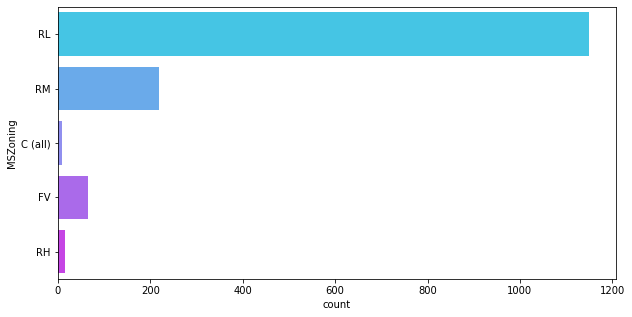

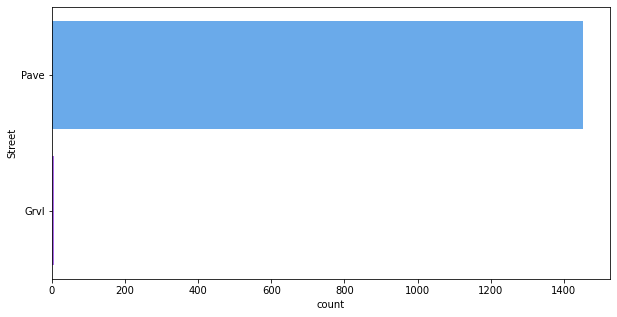

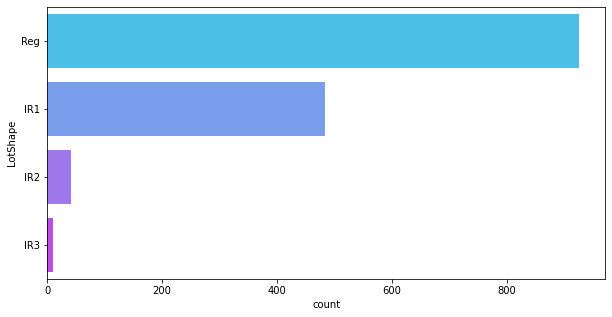

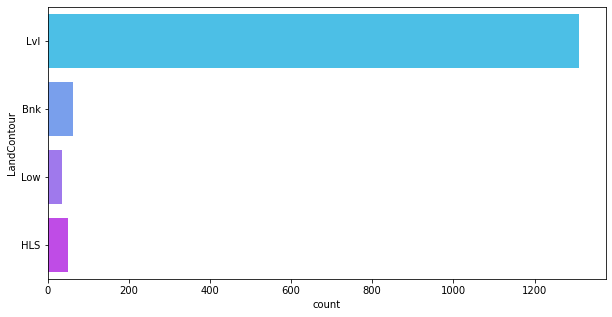

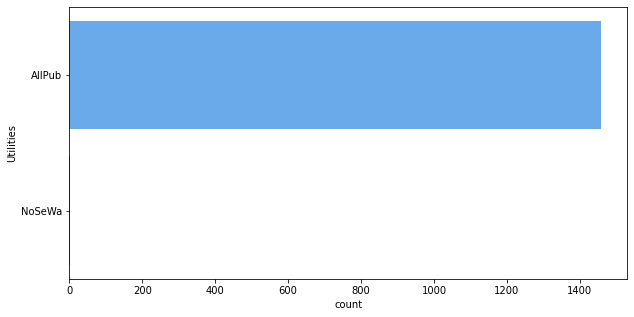

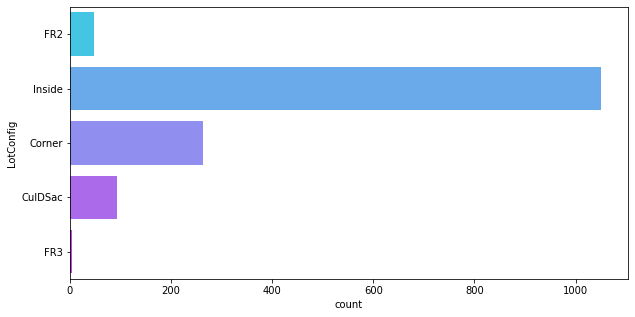

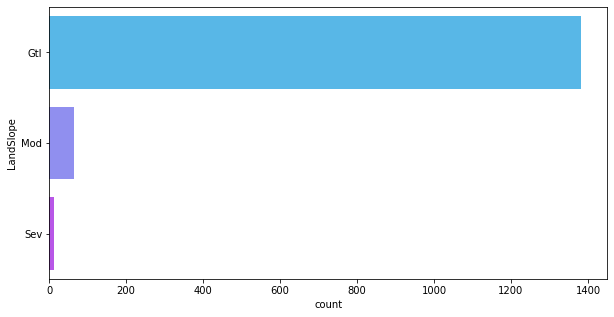

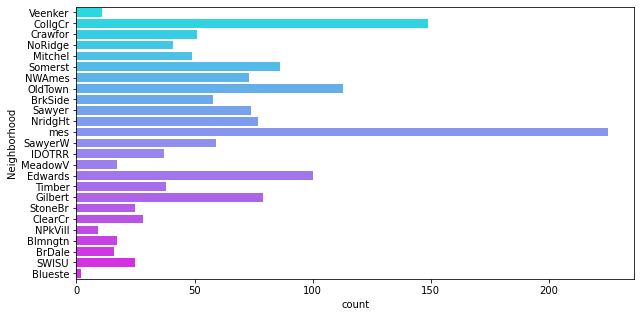

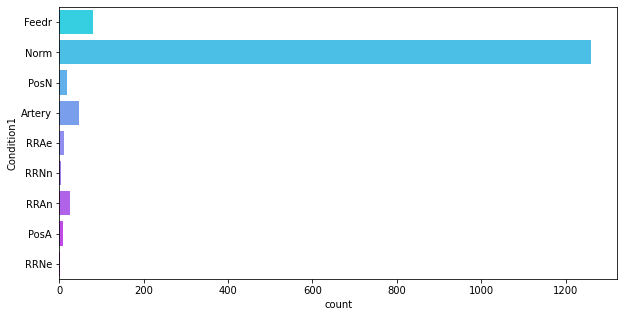

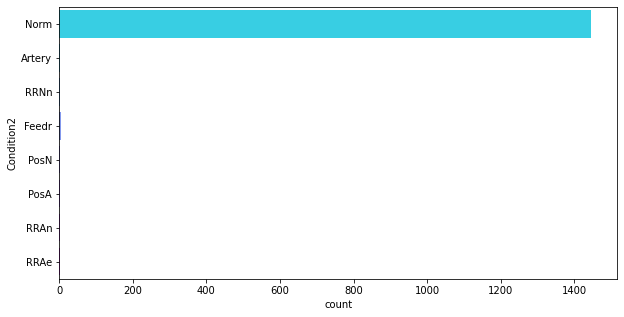

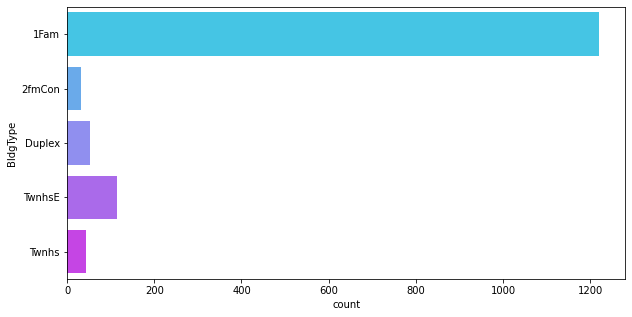

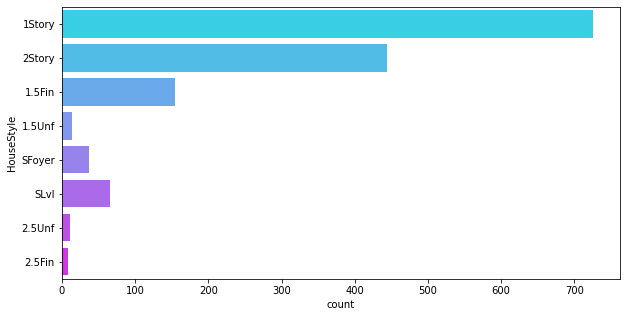

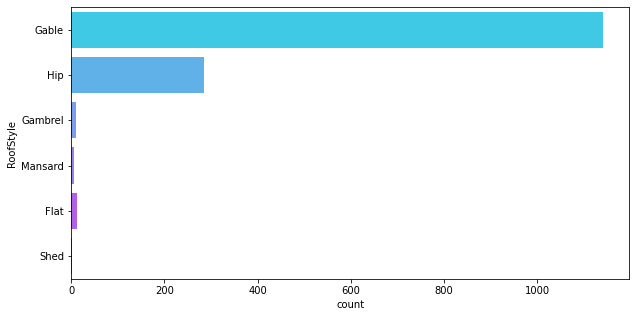

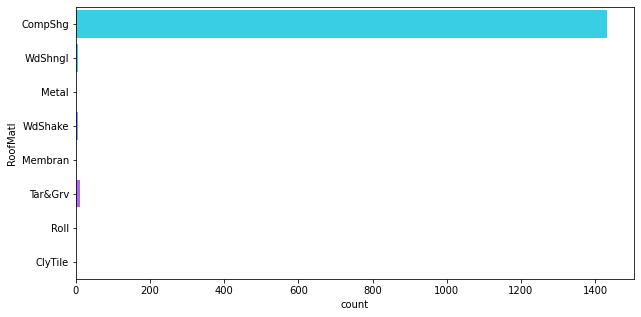

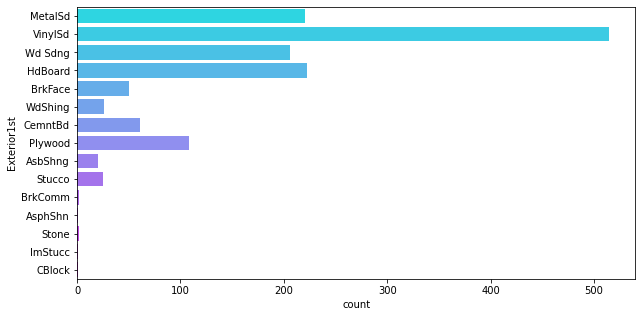

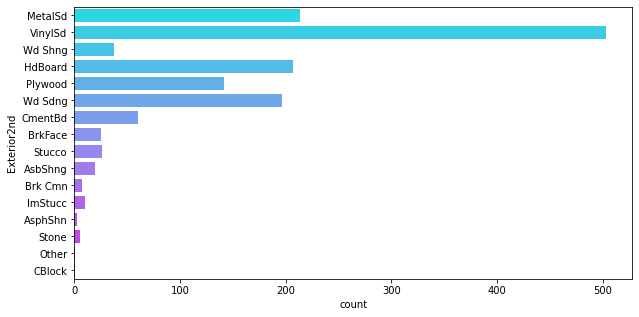

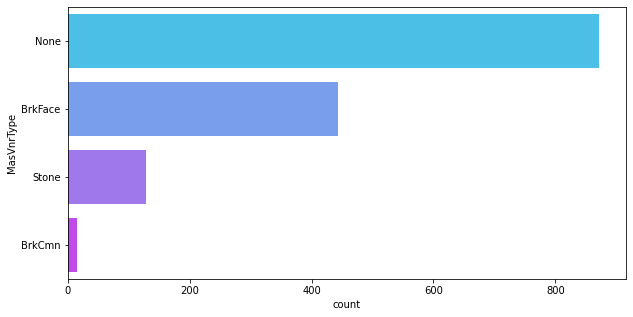

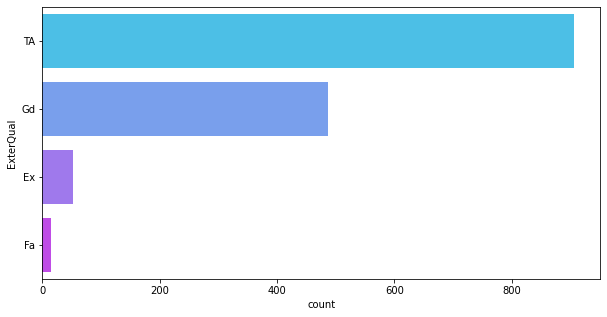

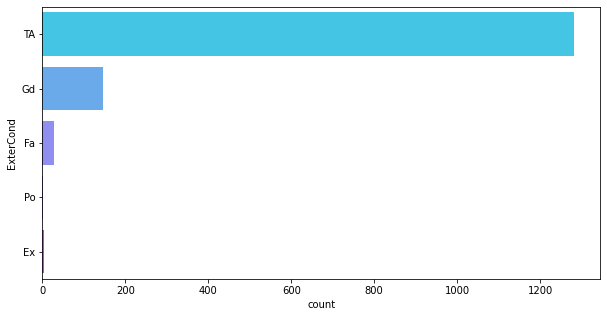

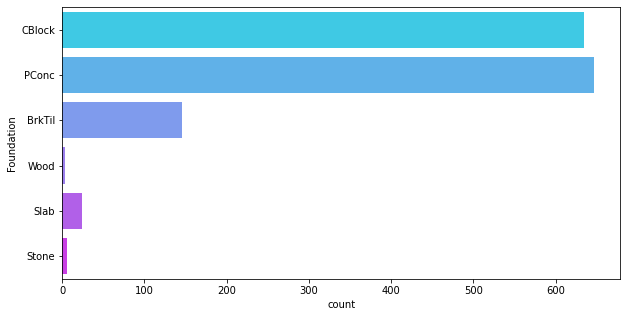

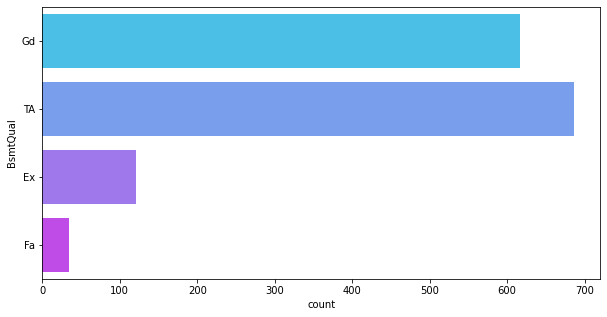

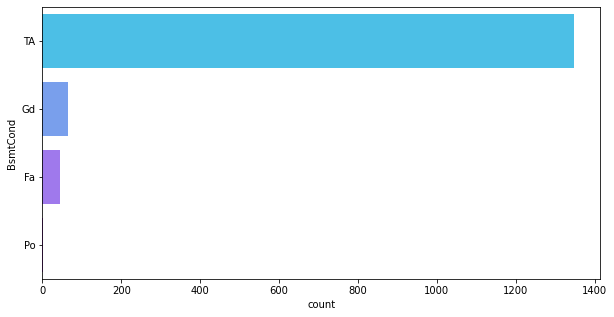

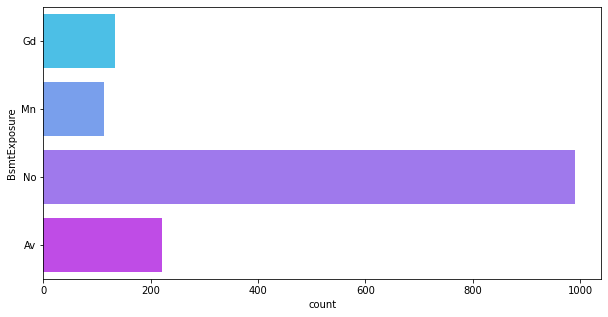

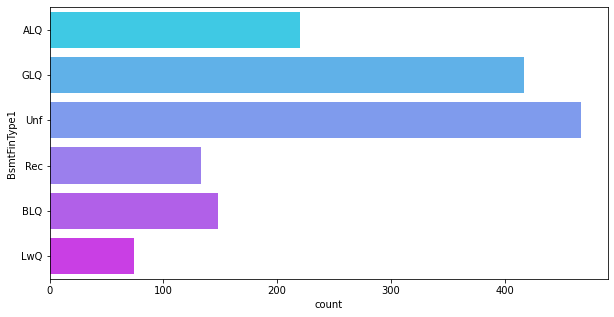

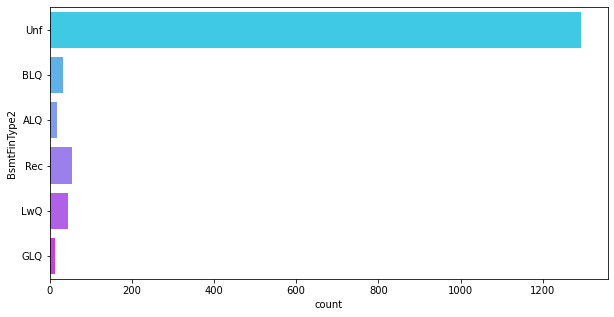

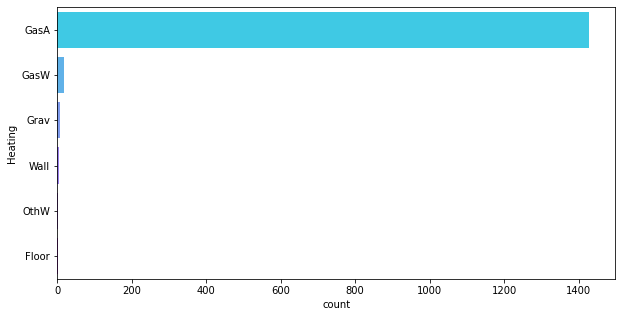

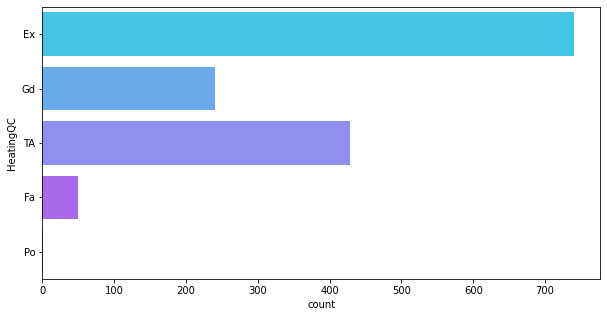

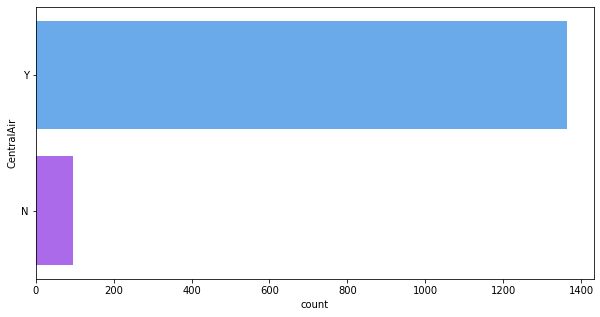

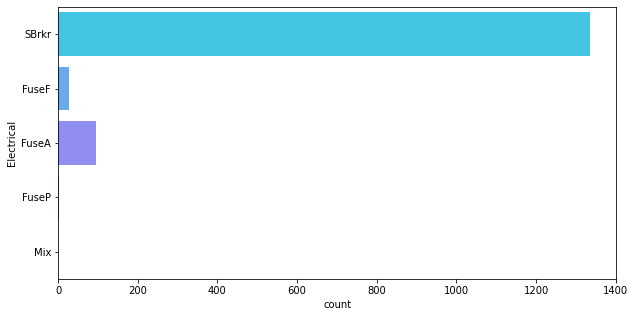

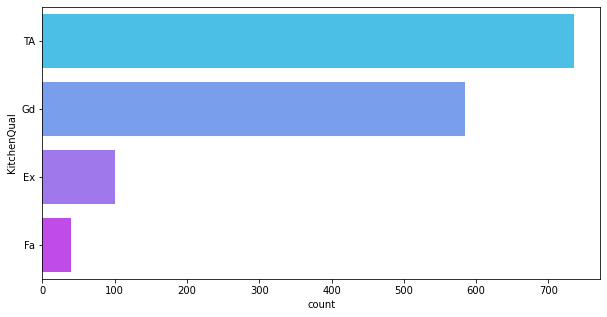

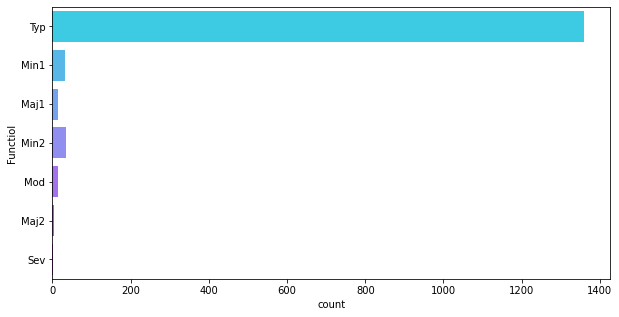

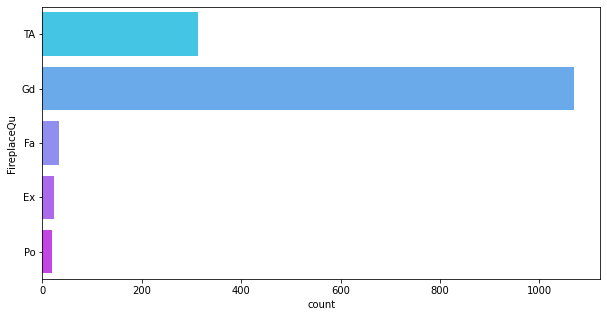

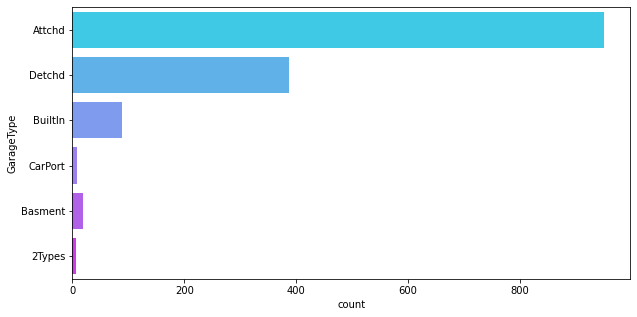

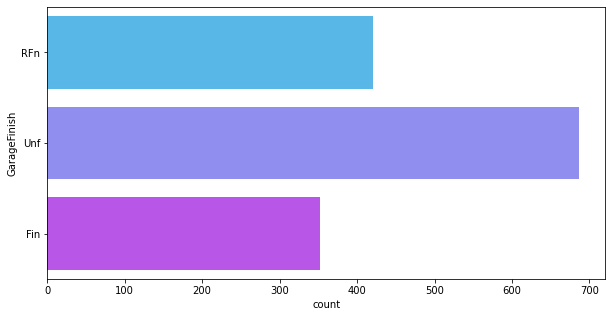

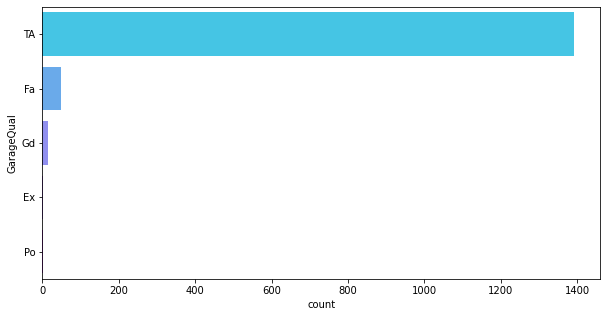

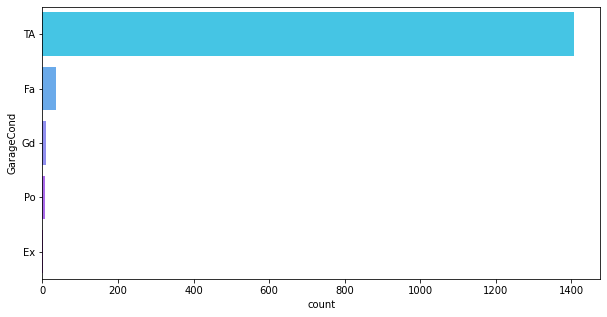

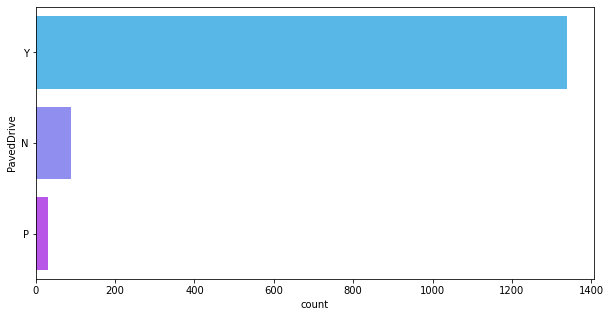

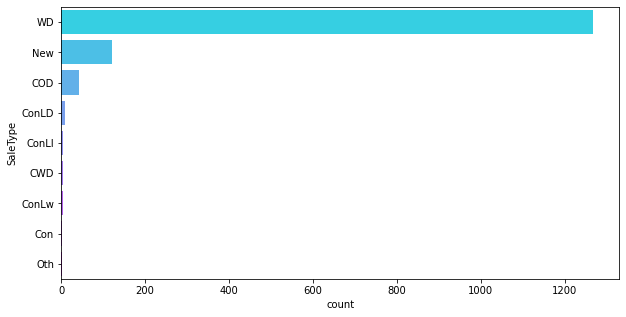

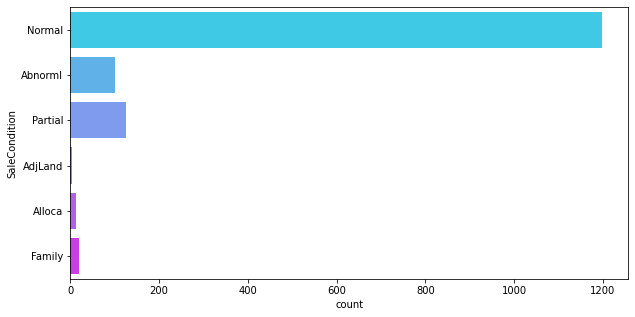

In [20]:
cols = [ 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 
        'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 
        'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
        'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functiol', 'FireplaceQu', 
        'GarageType', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

for i in cols:
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    sns.countplot(data=impute_categoric_data, y=impute_categoric_data[i][1:], palette='cool')

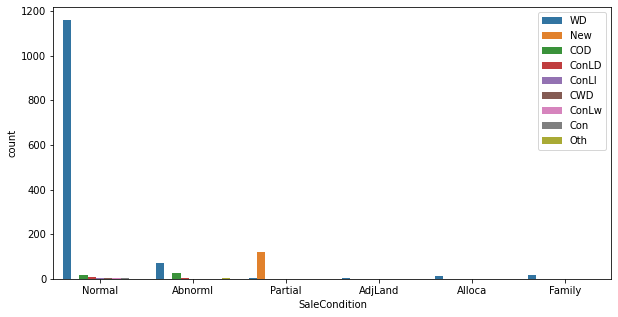

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(impute_categoric_data.SaleCondition, hue = 'SaleType', data=impute_categoric_data)
plt.legend(loc='upper right')

In [23]:
# c. Identify significant variables using p-values and Chi-Square values

from scipy import stats

data_cross = pd.crosstab(impute_categoric_data['SaleType'],impute_categoric_data['SaleCondition'])
coff,pval,dof,expec=stats.chi2_contingency(data_cross)
print("chisquare",coff)
print("Pvalue",pval)
print("DOF",dof)
print("Expected",expec)

chisquare 1652.6750772643866
Pvalue 0.0
DOF 40
Expected [[2.97465753e+00 1.17808219e-01 3.53424658e-01 5.89041096e-01
  3.52835616e+01 3.68150685e+00]
 [2.76712329e-01 1.09589041e-02 3.28767123e-02 5.47945205e-02
  3.28219178e+00 3.42465753e-01]
 [1.38356164e-01 5.47945205e-03 1.64383562e-02 2.73972603e-02
  1.64109589e+00 1.71232877e-01]
 [6.22602740e-01 2.46575342e-02 7.39726027e-02 1.23287671e-01
  7.38493151e+00 7.70547945e-01]
 [3.45890411e-01 1.36986301e-02 4.10958904e-02 6.84931507e-02
  4.10273973e+00 4.28082192e-01]
 [3.45890411e-01 1.36986301e-02 4.10958904e-02 6.84931507e-02
  4.10273973e+00 4.28082192e-01]
 [8.43972603e+00 3.34246575e-01 1.00273973e+00 1.67123288e+00
  1.00106849e+02 1.04452055e+01]
 [2.07534247e-01 8.21917808e-03 2.46575342e-02 4.10958904e-02
  2.46164384e+00 2.56849315e-01]
 [8.76486301e+01 3.47123288e+00 1.04136986e+01 1.73561644e+01
  1.03963425e+03 1.08476027e+02]]


In [24]:
if pval<0.05:
    print("Alter Hypo----->relation exist")
else:
    print("Null Hypo---->No relation")

Alter Hypo----->relation exist


# 5. Combine all the significant categorical and numerical variables

In [25]:
df_combine = pd.concat([impute_numeric_data,impute_categoric_data],axis=1)
df_combine.drop(['Id','LotFrontage','LotArea','TotRmsAbvGrd','YearBuilt','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
                 'TotalBsmtSF','EnclosedPorch','YearRemodAdd','GarageYrBlt','BsmtFullBath','BsmtUnfSF','MSSubClass',
                 '1stFlrSF','2ndFlrSF','PoolQC','MiscFeature','Fence','Alley','GrLivArea','GarageArea',
                 'WoodDeckSF', 'OpenPorchSF','ScreenPorch'], axis=1, inplace=True)
df_combine.head()

,OverallQual,OverallCond,LowQualFinSF,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchebvGr,Fireplaces,GarageCars,...,KitchenQual,Functiol,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,7.0,5.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,2.0,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,6.0,8.0,0.0,1.0,2.0,0.0,3.0,1.0,1.0,2.0,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,7.0,5.0,0.0,0.0,2.0,1.0,3.0,1.0,1.0,2.0,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,7.0,5.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,3.0,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,8.0,5.0,0.0,0.0,2.0,1.0,4.0,1.0,1.0,3.0,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


# 6. Plot box plot for the new dataset to find the variables with outliers

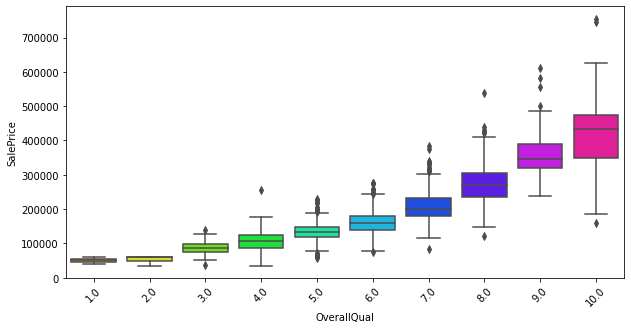

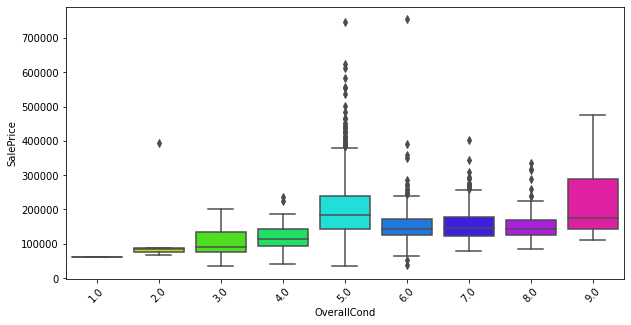

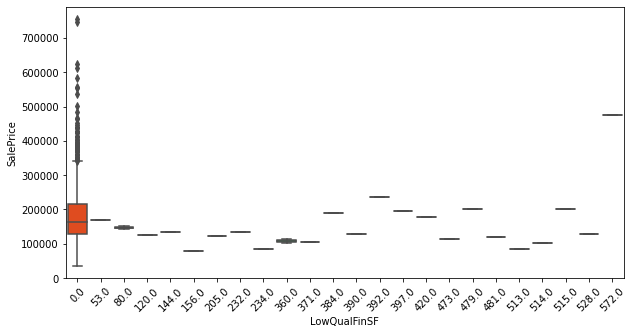

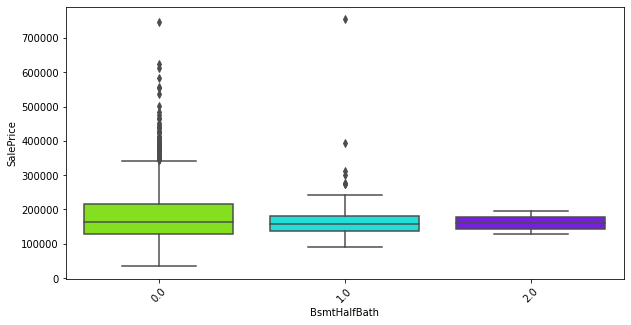

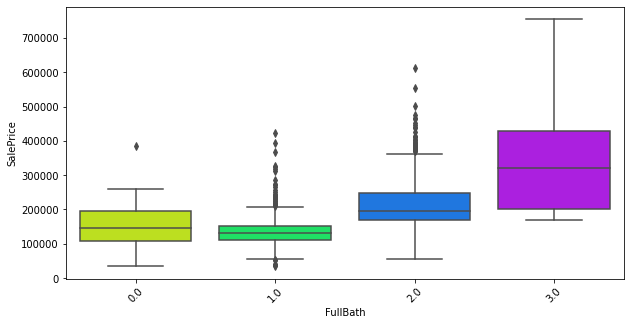

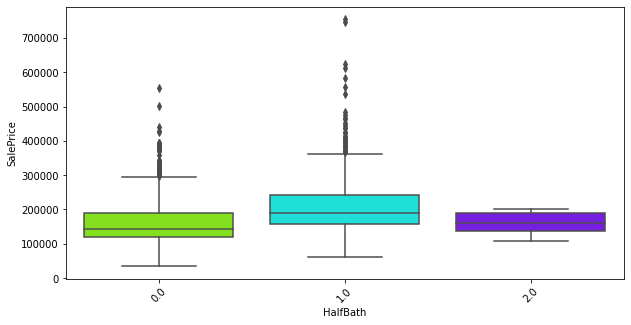

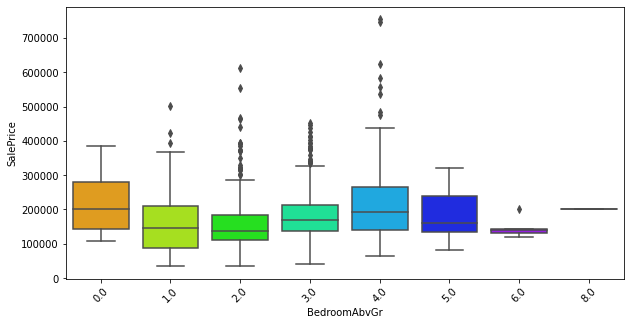

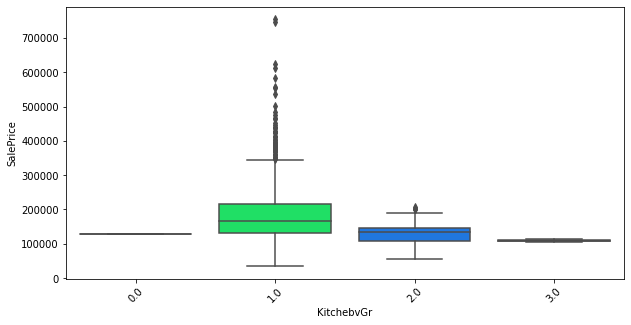

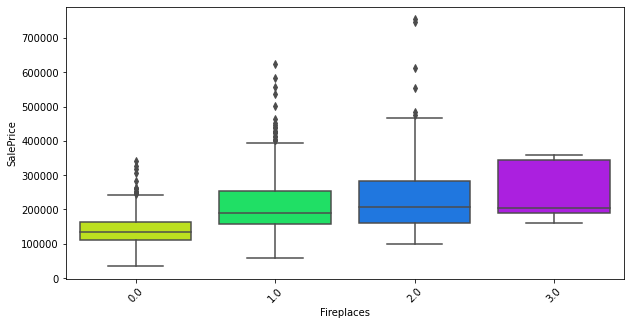

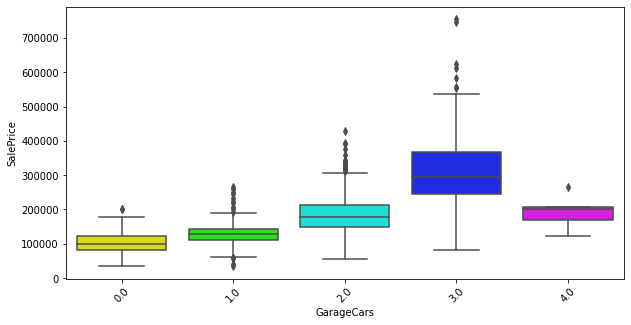

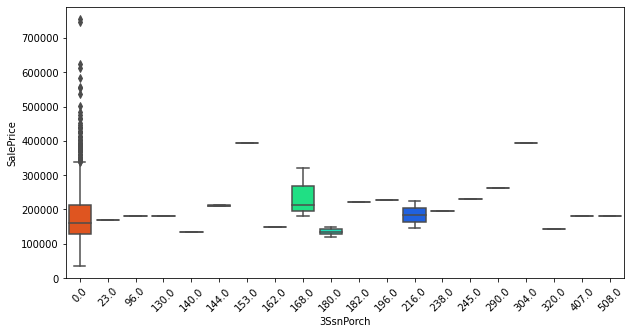

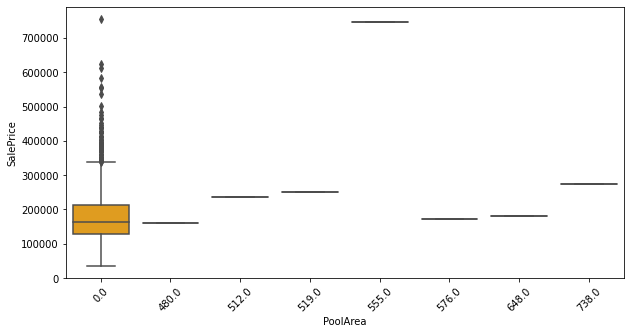

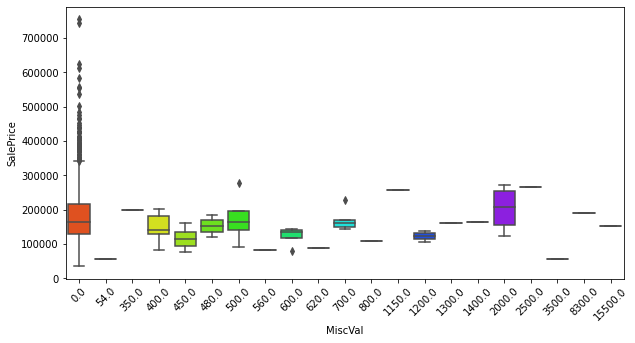

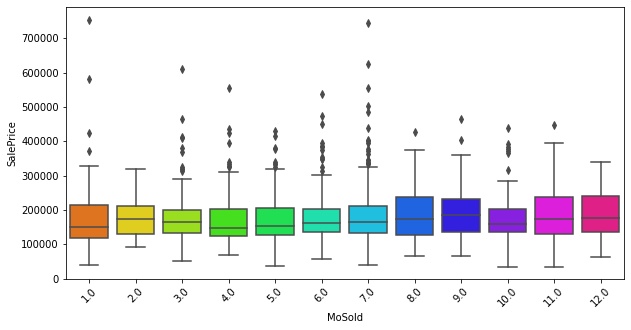

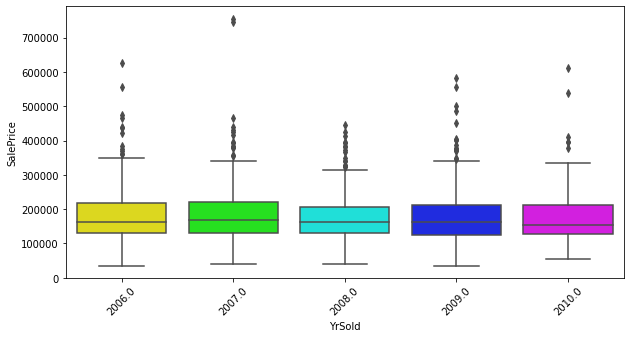

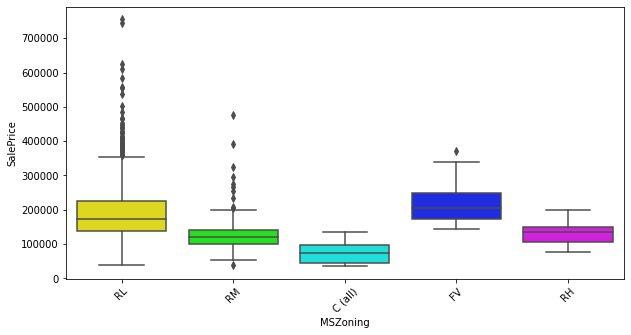

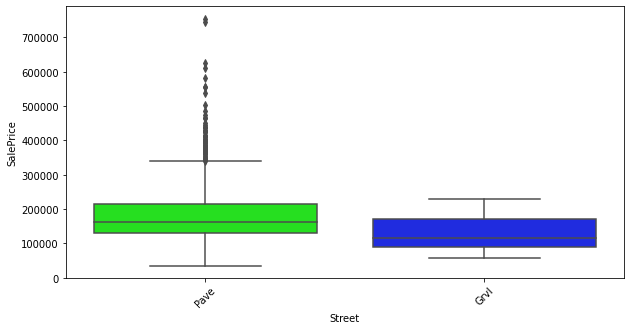

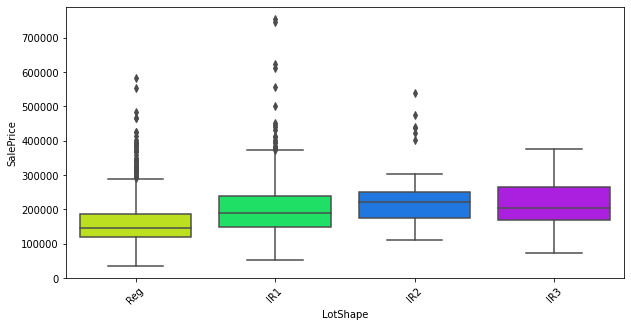

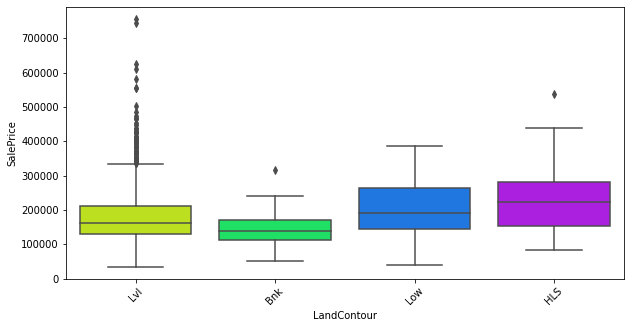

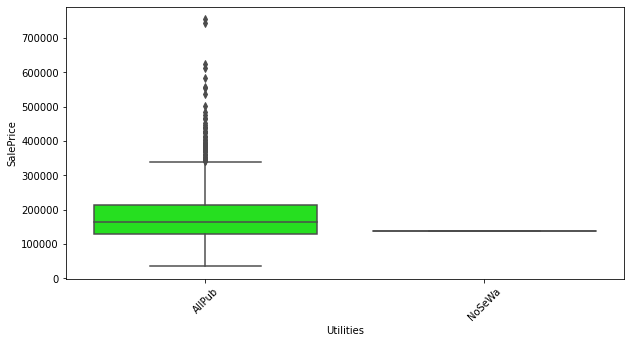

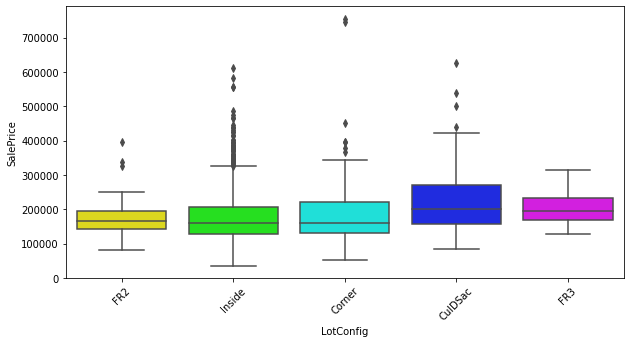

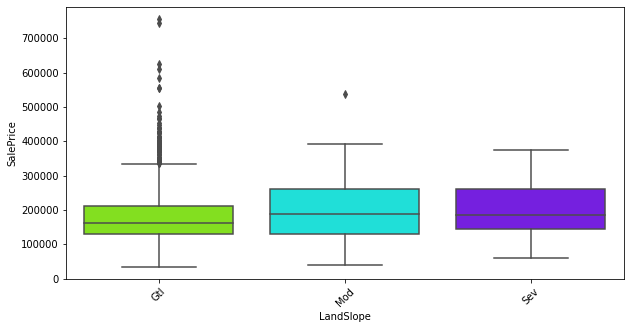

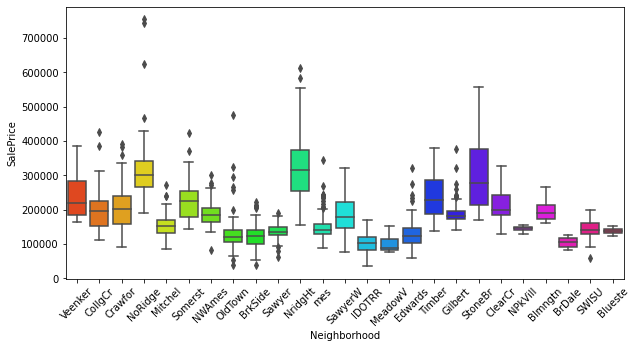

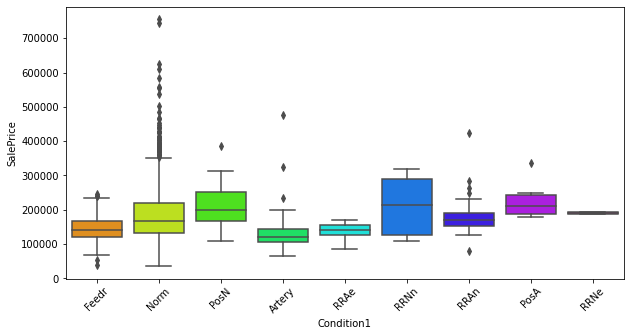

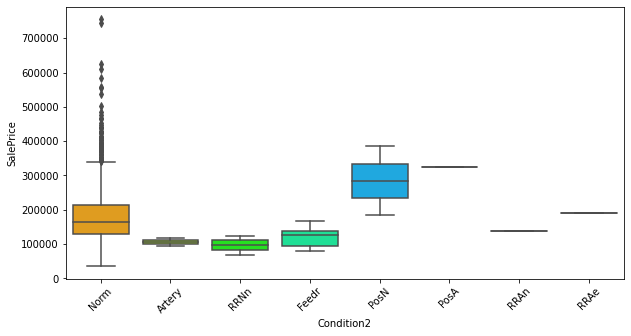

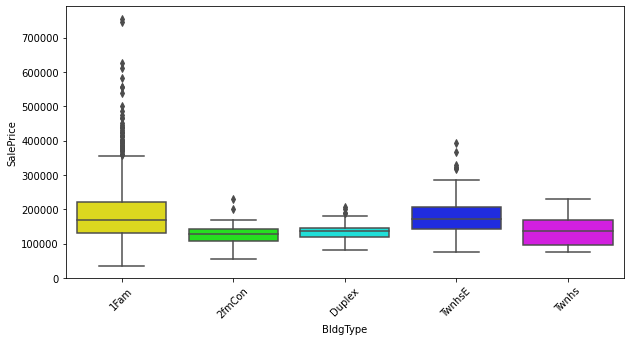

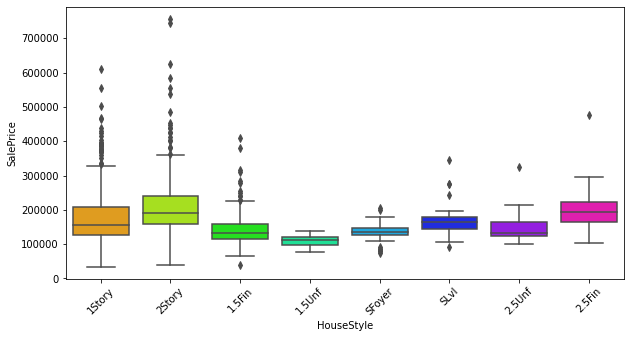

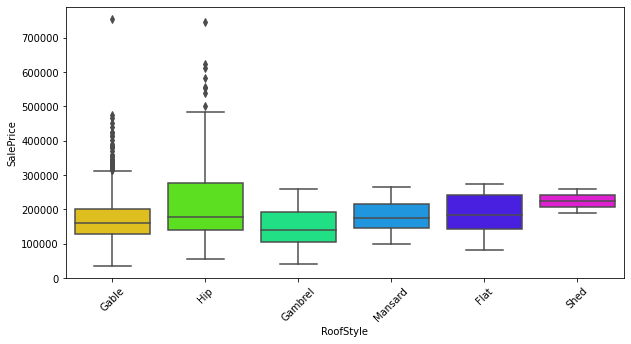

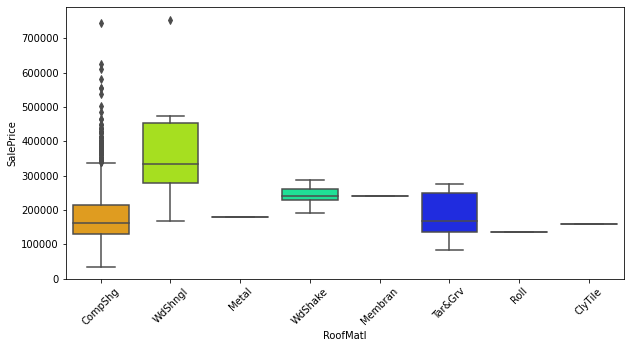

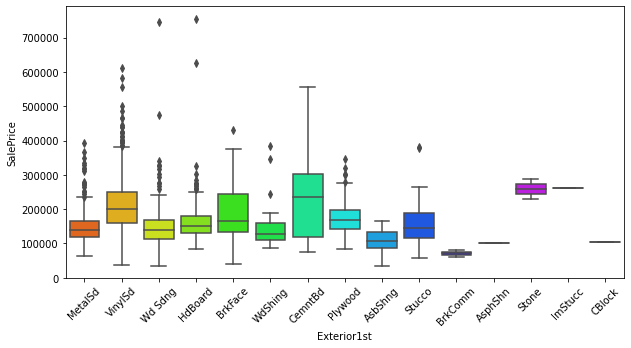

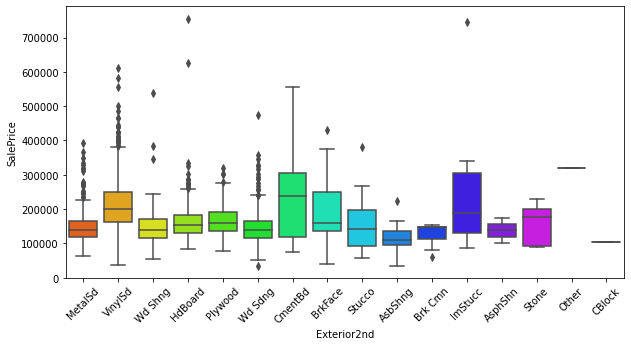

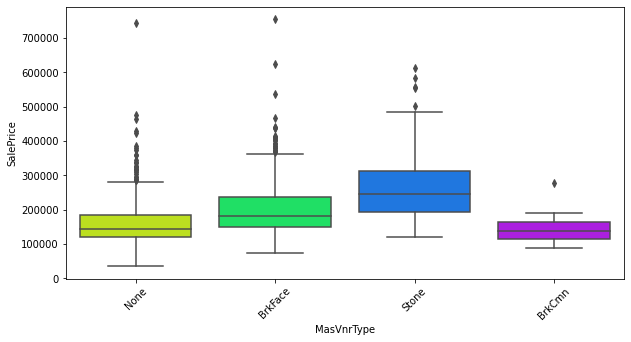

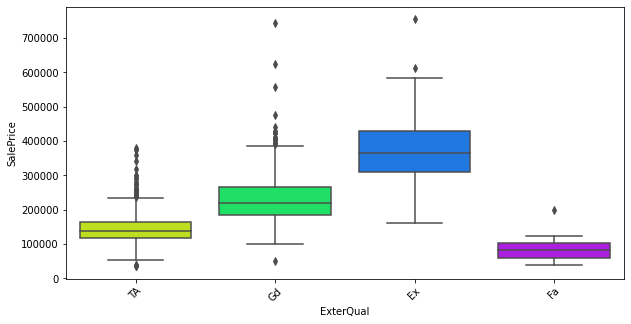

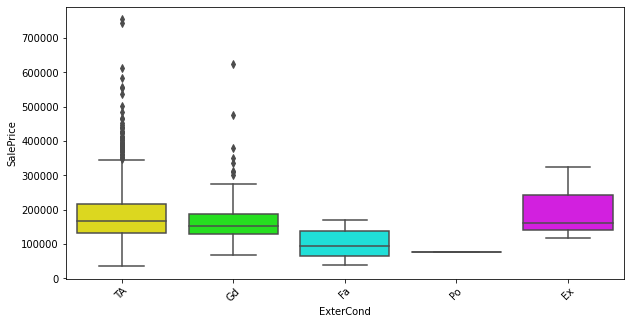

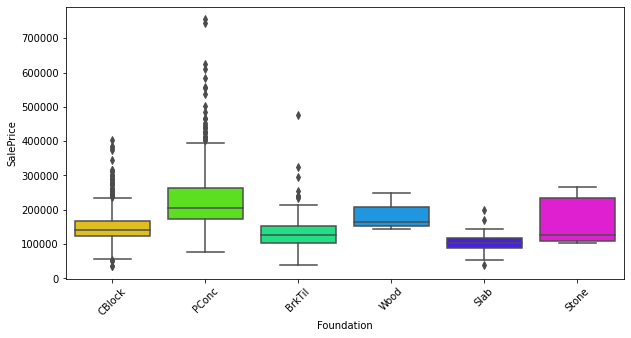

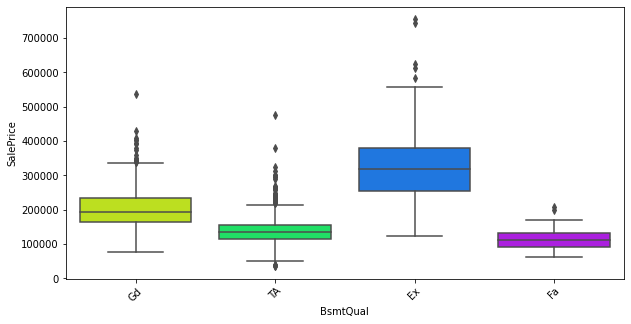

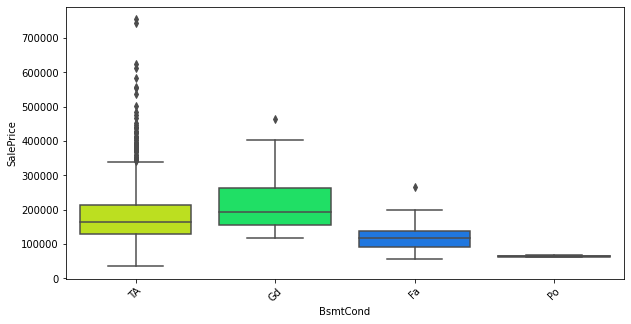

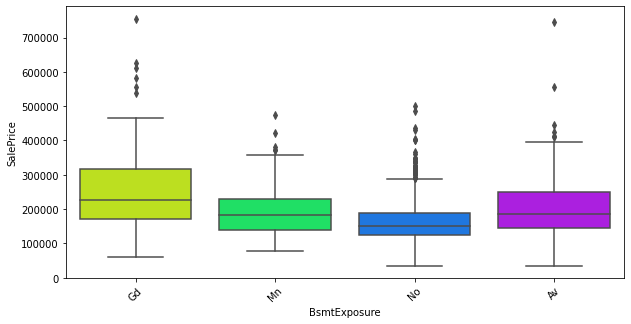

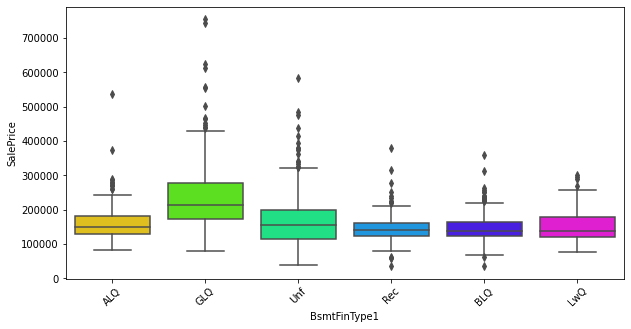

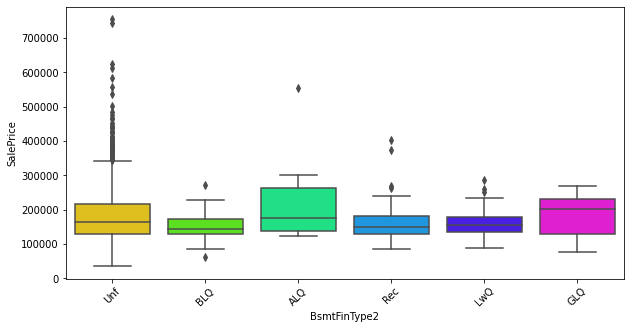

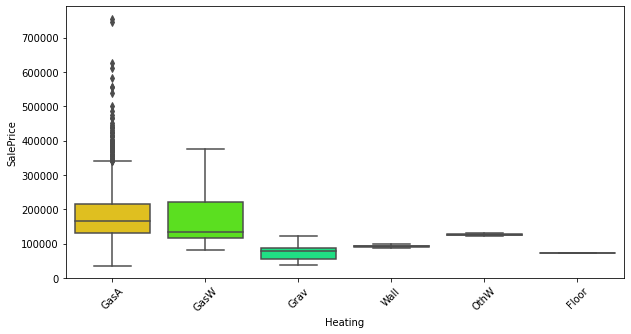

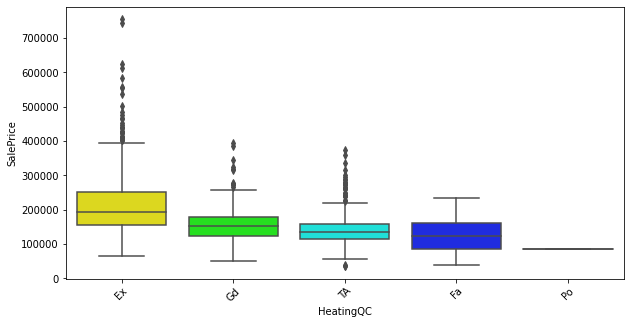

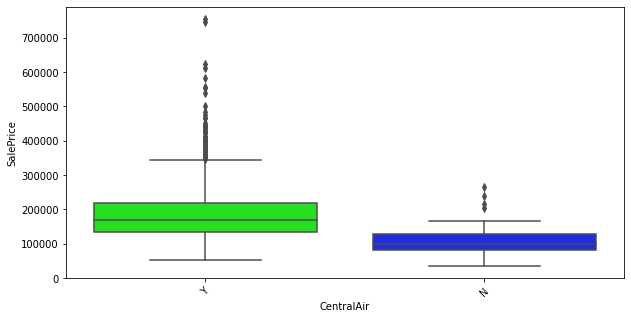

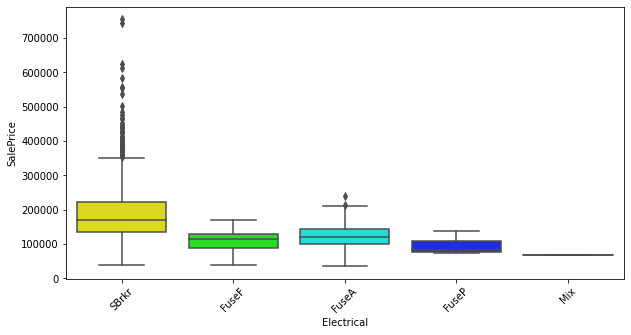

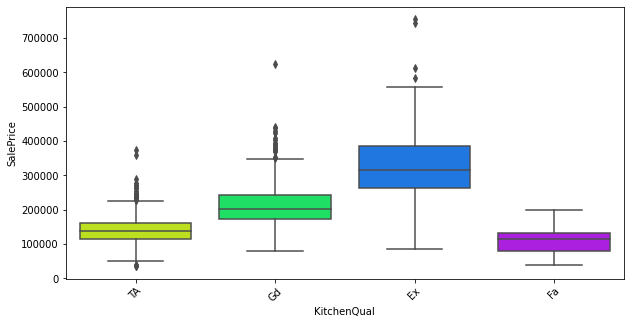

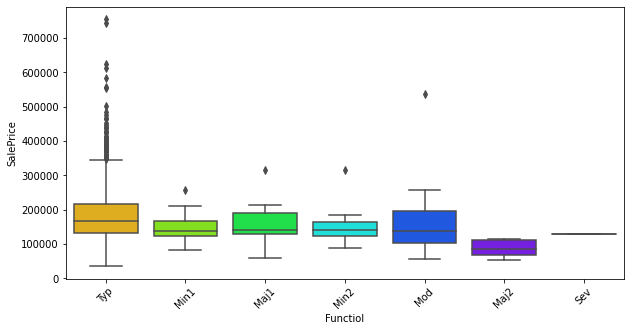

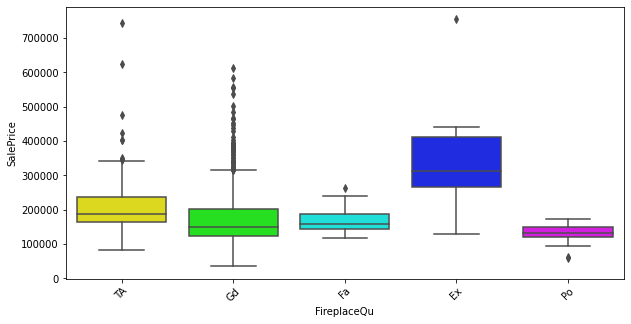

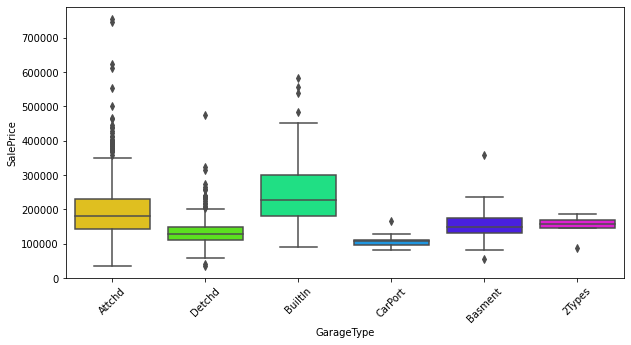

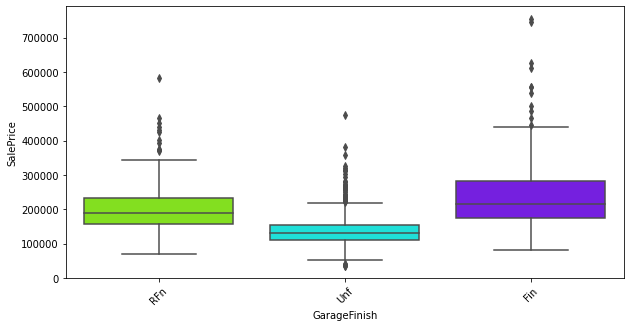

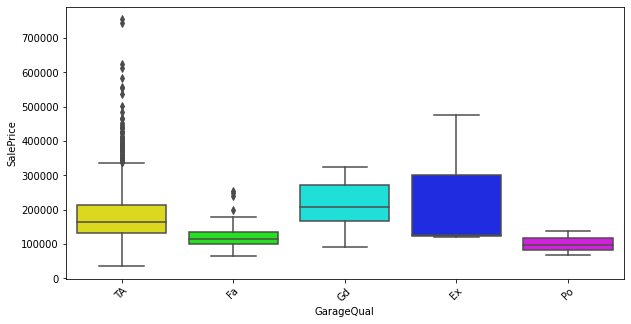

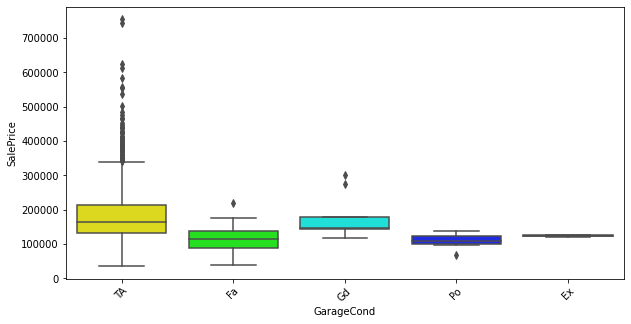

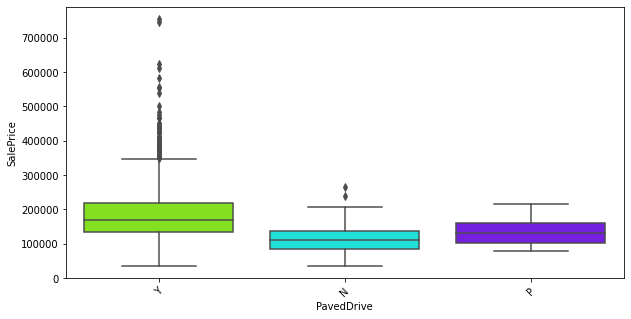

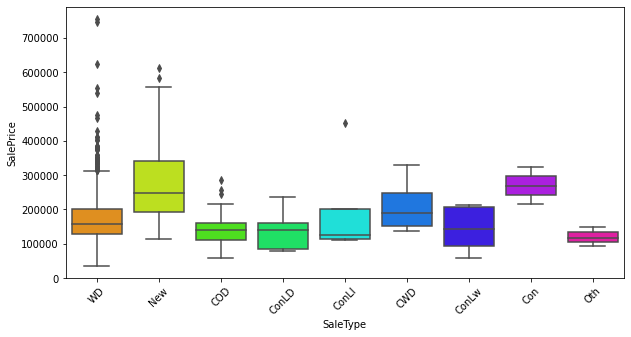

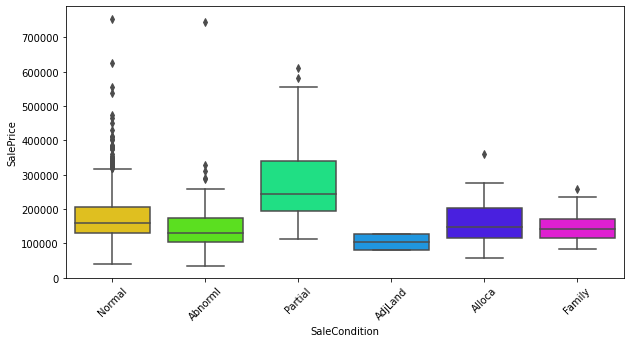

In [26]:
cols =['OverallQual','OverallCond','LowQualFinSF','BsmtHalfBath', 'FullBath','HalfBath','BedroomAbvGr','KitchebvGr', 
       'Fireplaces','GarageCars','3SsnPorch','PoolArea', 'MiscVal','MoSold', 'YrSold','MSZoning','Street','LotShape',
       'LandContour','Utilities','LotConfig','LandSlope','Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd','MasVnrType', 'ExterQual', 'ExterCond', 
       'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating','HeatingQC', 
       'CentralAir', 'Electrical', 'KitchenQual', 'Functiol','FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
       'GarageCond','PavedDrive', 'SaleType', 'SaleCondition']    
    
for i in cols:
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    plt.xticks(rotation = 45)
    sns.boxplot(df_combine[i][1:], 'SalePrice', data=df_combine,palette='hsv')